In [1]:
# import os 
# os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] ='false'
# os.environ['XLA_PYTHON_CLIENT_ALLOCATOR']='platform'
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def image_show(X, y, index):
    plt.figure(figsize=(5, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

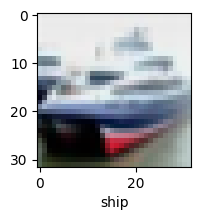

In [11]:
image_show(X_test, y_test, 1)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8101 - accuracy: 0.3553
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6191 - accuracy: 0.4309
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5374 - accuracy: 0.4582
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4784 - accuracy: 0.4793
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4276 - accuracy: 0.4981
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3853 - accuracy: 0.5125
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3438 - accuracy: 0.5285
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3099 - accuracy: 0.5406
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2753 - accuracy: 0.5529
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.244

In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4488 - accuracy: 0.4757


[1.4487898349761963, 0.4756999909877777]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_n = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

           0       0.36      0.82      0.50      1000
           1       0.54      0.70      0.61      1000
           2       0.56      0.20      0.29      1000
           3       0.44      0.19      0.27      1000
           4       0.39      0.55      0.46      1000
           5       0.35      0.56      0.43      1000
           6       0.73      0.36      0.49      1000
           7       0.69      0.45      0.54      1000
           8       0.65      0.52      0.58      1000
           9       0.61      0.40      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.53      0.48      0.46     10000
weighted avg       0.53      0.48      0.46     10000



In [18]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)), # filters size and kernel size and relu , this is the convolutional + relu layer
    keras.layers.MaxPooling2D((2,2)), # size of the pooling grid this is the pooling layer
    
    keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'), # as we know we can add as much layers we want of convolutional and pooling
    keras.layers.MaxPooling2D((2,2)),
    
    # below is the normal ANN
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4767 - accuracy: 0.4726
Epoch 2/2
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1336 - accuracy: 0.6005


In [ ]:
%%timeit -n1 -r1 # this will tell us the time it took to finist the trainnig
with tf.device('/CPU:0'): # running trainnig on CPU
    cpu_model = cnn
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
image_show(X_test, y_test, 1)

In [ ]:
y_pred_c = cnn.predict(X_test) 

In [ ]:
y_classes = [np.argmax(element) for element in y_pred_c]

In [ ]:
image_show(X_test, y_test, 2)

In [ ]:
classes[y_classes[2]]

In [ ]:
print(classification_report(y_test, y_classes))